In [1]:
# Data Processing
import pandas as pd
import numpy as np
import graphviz

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score ,f1_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

from sklearn.preprocessing import MinMaxScaler

from sklearn import preprocessing
from IPython.display import display
import cv2
import os



In [2]:
Categories=['benign','malignant']
flat_data_arr=[] #input array
target_arr=[] #output array
flat_data_arr_test=[] #input array
target_arr_test=[] #output array
datadir='../Dataset/train/' 

#path which contains all the categories of images

# read train dataaaaaa
for i in Categories:
    path=os.path.join(datadir,i)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        img_resized=cv2.resize(img_array,(150,150))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(Categories.index(i))
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)


In [3]:
datadir='../Dataset/test/' 

# read train dataaaaaa
for i in Categories:
    path=os.path.join(datadir,i)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        img_resized=cv2.resize(img_array,(150,150))
        flat_data_arr_test.append(img_resized.flatten())
        target_arr_test.append(Categories.index(i))
flat_data_arr_test=np.array(flat_data_arr_test)
target_test=np.array(target_arr_test)



In [4]:
X=flat_data
Y=target


In [5]:
X_train , y_train  = X,Y
X_test=flat_data_arr_test
y_test =target_test

In [6]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [7]:
y_pred = rf.predict(X_test)

Accuracy: 0.8287878787878787
Recall: 0.87
Precision: 0.7791044776119403
F1_score: 0.8220472440944883


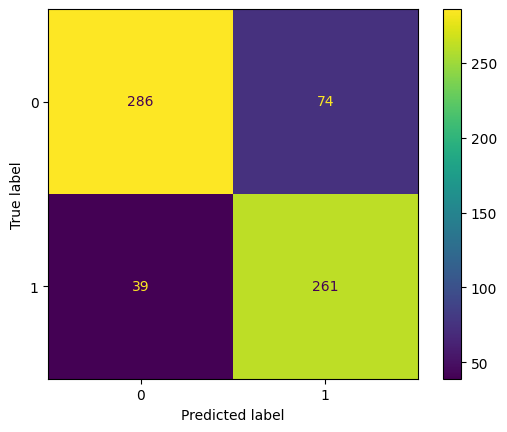

In [8]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
recall = recall_score(y_test, y_pred, zero_division=1)

print('Recall:', recall)
# Calculate precision and recall with zero_division parameter
precision = precision_score(y_test, y_pred, zero_division=1)

print('Precision:', precision)
f1 = f1_score(y_test,y_pred)
print('F1_score:', f1)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [9]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000229EFE45F50>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000229EFD24550>})

In [10]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 16, 'n_estimators': 314}


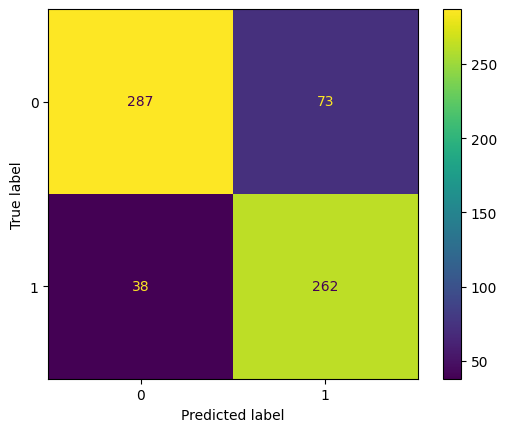

In [11]:

y_pred= best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [12]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
recall = recall_score(y_test, y_pred, zero_division=1)

print('Recall:', recall)
# Calculate precision and recall with zero_division parameter
precision = precision_score(y_test, y_pred, zero_division=1)

print('Precision:', precision)
f1 = f1_score(y_test,y_pred)
print('F1_score:', f1)

Accuracy: 0.8318181818181818
Recall: 0.8733333333333333
Precision: 0.7820895522388059
F1_score: 0.8251968503937007
